In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from utils.data_gatherer import *
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')
import datetime as datetime
import pandas_datareader as pdr

In [2]:
def MSForecast(ret, fsteps):

    order = 3
    model = sm.tsa.MarkovAutoregression(ret, k_regimes=2, order=order, switching_ar=True)
    results = model.fit()
    
    fig, axes = plt.subplots(2, figsize=(7,7))
    ax = axes[0]
    ax.plot(results.filtered_marginal_probabilities)
    ax.set(title='Filtered probability')
    ax = axes[1]
    ax.plot(results.smoothed_marginal_probabilities)
    ax.set(title='Smoothed probability')
    fig.tight_layout()
    
    retf = results.predict(len(ret) - order - fsteps)
    print(results.summary())
    return retf

### Tesla Prediction

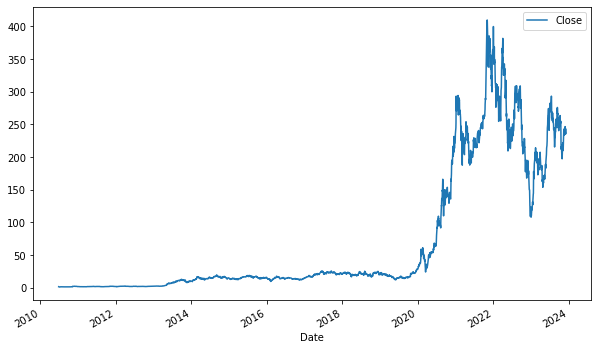

In [11]:
symbol = 'TSLA'
tesla_data = yf.Ticker(symbol).history(period="20y")[['Close']]
log_price = np.log(tesla_data['Close'])
returns_series = (log_price.diff())
ret = returns_series.dropna()
tesla_data.plot(label = 'TESLA Price', figsize=(10, 6))
plt.show()

                         Markov Switching Model Results                         
Dep. Variable:                    Close   No. Observations:                 3380
Model:             MarkovAutoregression   Log Likelihood                6555.376
Date:                  Wed, 06 Dec 2023   AIC                         -13088.752
Time:                          23:27:02   BIC                         -13021.370
Sample:                               0   HQIC                        -13064.661
                                 - 3380                                         
Covariance Type:                 approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0027      0.001      3.010      0.003       0.001       0.004
ar.L1         -0.1318      0.027    

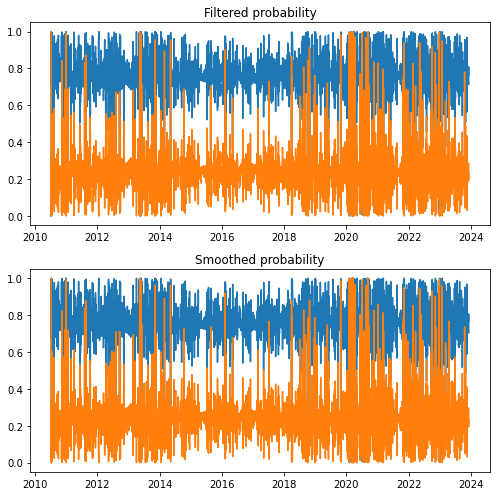

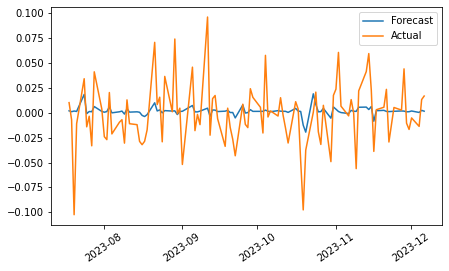

Date
2023-07-18 00:00:00-04:00    0.001949
2023-07-19 00:00:00-04:00    0.001068
2023-07-20 00:00:00-04:00    0.001715
2023-07-21 00:00:00-04:00    0.001315
2023-07-24 00:00:00-04:00    0.018411
                               ...   
2023-11-30 00:00:00-05:00    0.001045
2023-12-01 00:00:00-05:00    0.001754
2023-12-04 00:00:00-05:00    0.000293
2023-12-05 00:00:00-05:00    0.002388
2023-12-06 00:00:00-05:00    0.001546
Length: 100, dtype: float64


In [4]:
ret = returns_series.dropna()
yf_ = MSForecast(ret, fsteps=100)
plt.figure(figsize=(7, 4))
plt.plot(yf_, label = 'Forecast')
plt.plot(ret[(yf_.index)], label = 'Actual')
plt.xticks(rotation = 35)
plt.legend()
plt.show()
print(yf_)

### GDP Prediction

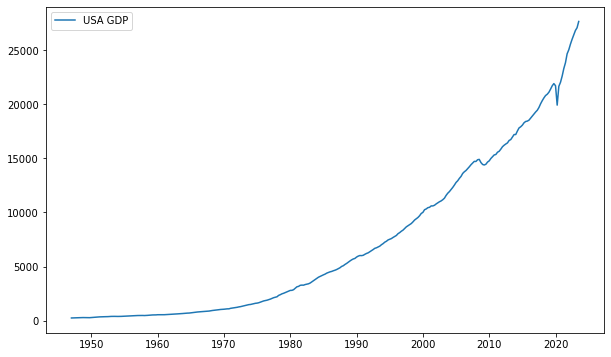

In [5]:
start = datetime.datetime(1900, 1, 1)
end = datetime.datetime(2024, 1, 1)
gdp_data = pdr.data.DataReader('GDP', data_source = 'fred', start = start, end = end)
plt.figure(figsize=(10, 6))
plt.plot(gdp_data, label = 'USA GDP')
plt.legend()
plt.show()

In [6]:
log_gdp = np.log(gdp_data['GDP'])
returns_series = (log_gdp.diff())
ret = returns_series.dropna()

                         Markov Switching Model Results                         
Dep. Variable:                      GDP   No. Observations:                  303
Model:             MarkovAutoregression   Log Likelihood                 951.074
Date:                  Wed, 06 Dec 2023   AIC                          -1880.147
Time:                          23:27:05   BIC                          -1839.296
Sample:                      04-01-1947   HQIC                         -1863.804
                           - 07-01-2023                                         
Covariance Type:                 approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0185      0.004      4.150      0.000       0.010       0.027
ar.L1         -0.7746      0.158    

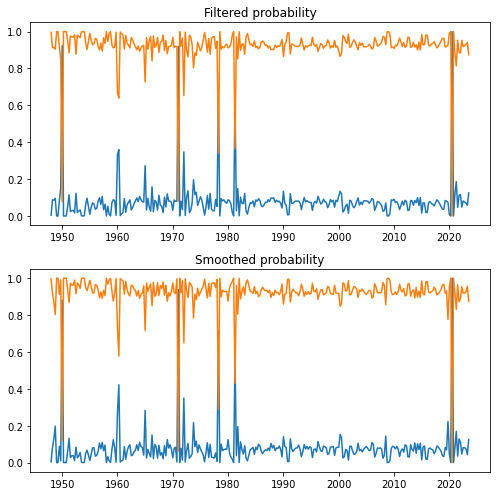

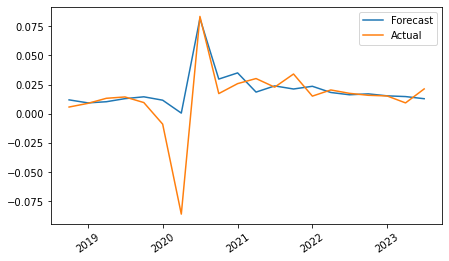

2018-10-01    0.011861
2019-01-01    0.009273
2019-04-01    0.010264
2019-07-01    0.012917
2019-10-01    0.014487
2020-01-01    0.011589
2020-04-01    0.000505
2020-07-01    0.081830
2020-10-01    0.029716
2021-01-01    0.035020
2021-04-01    0.018544
2021-07-01    0.023841
2021-10-01    0.021195
2022-01-01    0.023528
2022-04-01    0.018210
2022-07-01    0.016239
2022-10-01    0.017012
2023-01-01    0.015314
2023-04-01    0.014692
2023-07-01    0.012854
Freq: QS-OCT, dtype: float64


In [7]:
yf_ = MSForecast(ret, fsteps=20)
plt.figure(figsize=(7, 4))
plt.plot(yf_, label = 'Forecast')
plt.plot(ret[(yf_.index)], label = 'Actual')
plt.xticks(rotation = 35)
plt.legend()
plt.show()
print(yf_)